# Tarea 7 Abraham Nieto 51556 y Ricardo Lastra 160167

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
## Paquete para mejorar la estética de matplolib
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

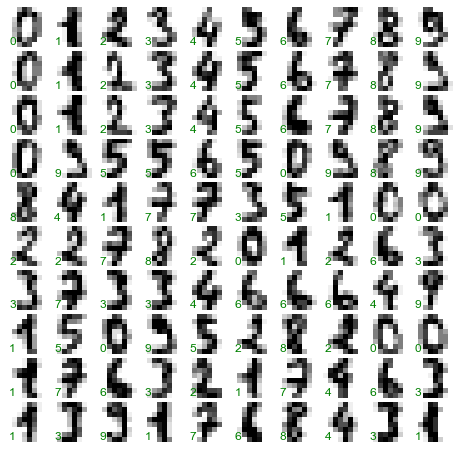

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

digits.images.shape

import matplotlib.pyplot as plt

fig, axes = plt.subplots(10,10, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

**Tarea 7/Ejercicio 1**

Inténtalo con PCA e Isomap ¿Cuál divide mejor este dataset?

In [3]:
X = digits.data

print("Dimensiones de los features: {}".format(X.shape))

y = digits.target
print("Dimensiones del target: {}".format(y.shape))

Dimensiones de los features: (1797, 64)
Dimensiones del target: (1797,)


**con TSNE**

C:\Users\FORANEA110\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


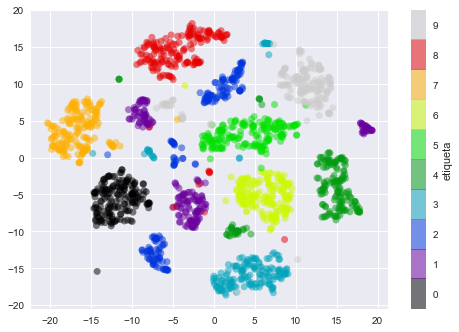

In [4]:
from sklearn.manifold import TSNE

tsne = TSNE()

X_projected = tsne.fit_transform(X)

X_projected.shape

plt.close()

plt.scatter(X_projected[:,0], X_projected[:,1], c=y,
            edgecolor = 'none',
            alpha = 0.5,
            cmap = plt.cm.get_cmap('spectral', 10))

plt.colorbar(label = 'etiqueta', ticks = range(10))

plt.clim(-0.5, 9.5)

**Con PCA**

C:\Users\FORANEA110\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


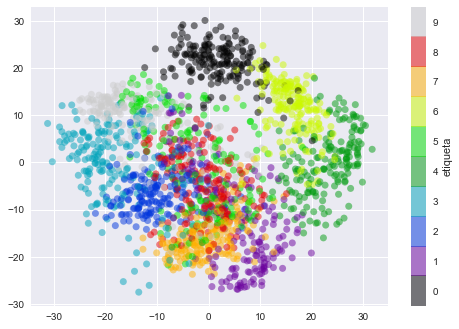

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X)
#X_pca = pca.transform(X)



X_projected = pca.transform(X)

X_projected.shape

plt.close()

plt.scatter(X_projected[:,0], X_projected[:,1], c=y,
            edgecolor = 'none',
            alpha = 0.5,
            cmap = plt.cm.get_cmap('spectral', 10))

plt.colorbar(label = 'etiqueta', ticks = range(10))

plt.clim(-0.5, 9.5)


**Con Isomap**

C:\Users\FORANEA110\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


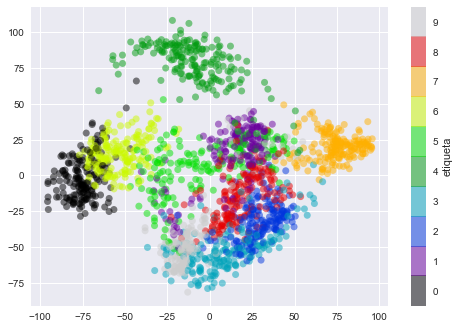

In [11]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors = 20)
iso.fit(X)
#X_iso = iso.transform(X)


X_projected = iso.transform(X)

X_projected.shape

plt.close()

plt.scatter(X_projected[:,0], X_projected[:,1], c=y,
            edgecolor = 'none',
            alpha = 0.5,
            cmap = plt.cm.get_cmap('spectral', 10))

plt.colorbar(label = 'etiqueta', ticks = range(10))

plt.clim(-0.5, 9.5)

**Entre Isomap y PCA separa visualmente mejor el primero, esto si nos fijamos SOLAMENTE en las primeras 2 componentes no sabemos que sucede si vemos la separación en más dimensiones o espacios.
A pesar de que existen 10 grupo o etiquetas ninguno de los 2 los aisla totalmente es decir en la gráfica de pca apenas se nota un grupo diferenciado de otro espacialmente hablando y en el isomap bajo esta perspectiva se notan al menos 3 separaciones y una de ellas es la clase 4 completa.**

**Tarea 7/Ejercicio 2**

Cambia los hiperparámetros del RandomForestClassifier: 

**a) Disminuye los árboles a 10 ?**

Accuracy: 0.9422222222222222
             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       0.95      0.91      0.93        45
          2       0.95      0.98      0.97        43
          3       0.89      0.98      0.93        41
          4       0.97      0.93      0.95        40
          5       0.90      0.96      0.92        45
          6       0.96      0.98      0.97        51
          7       0.96      0.92      0.94        50
          8       0.92      0.90      0.91        49
          9       0.94      0.92      0.93        48

avg / total       0.94      0.94      0.94       450



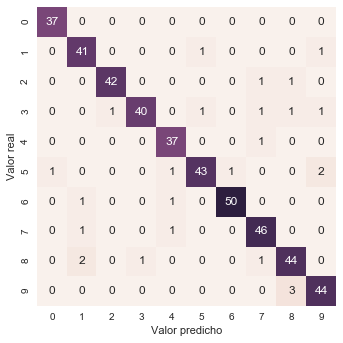

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=10)
model1.fit(X_train, y_train)
y_model1 = model1.predict(X_test)


## Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(y_test, y_model1)))

## Métricas clasicas de Clasificadores
from sklearn import metrics
print(metrics.classification_report(y_model1, y_test))

## Matriz de confusión
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model1)

plt.close()

sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')

**b) Cambia el # de features a considerar**

probamos con 10,20 y 30 features...

**Con 10**

Accuracy: 0.96
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        43
          1       1.00      0.88      0.94        50
          2       1.00      1.00      1.00        47
          3       0.98      0.95      0.96        42
          4       0.98      0.96      0.97        51
          5       0.96      0.98      0.97        48
          6       0.98      1.00      0.99        48
          7       0.96      0.98      0.97        44
          8       0.86      0.89      0.88        36
          9       0.87      0.98      0.92        41

avg / total       0.96      0.96      0.96       450



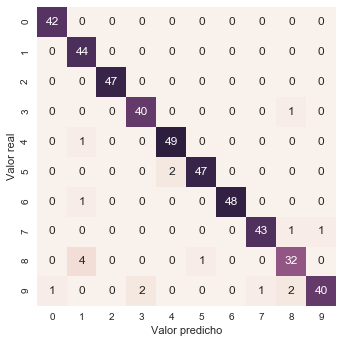

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=54)

from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(max_features=10)
model2.fit(X_train, y_train)
y_model2 = model2.predict(X_test)


## Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(y_test, y_model2)))

## Métricas clasicas de Clasificadores
from sklearn import metrics
print(metrics.classification_report(y_model2, y_test))

## Matriz de confusión
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model2)

plt.close()

sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')

**20 features**

Accuracy: 0.9511111111111111
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        43
          1       0.95      0.86      0.90        49
          2       0.98      0.98      0.98        47
          3       0.95      0.95      0.95        41
          4       0.98      0.98      0.98        50
          5       0.94      0.96      0.95        48
          6       0.98      0.98      0.98        49
          7       0.96      0.96      0.96        45
          8       0.86      0.97      0.91        33
          9       0.89      0.91      0.90        45

avg / total       0.95      0.95      0.95       450



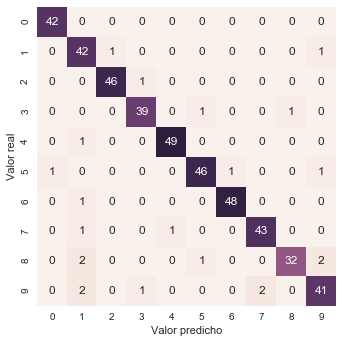

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=54)

from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(max_features=20)
model3.fit(X_train, y_train)
y_model3 = model3.predict(X_test)


## Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(y_test, y_model3)))

## Métricas clasicas de Clasificadores
from sklearn import metrics
print(metrics.classification_report(y_model3, y_test))

## Matriz de confusión
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model3)

plt.close()

sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')

**30 features**

Accuracy: 0.9333333333333333
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        43
          1       0.98      0.81      0.89        53
          2       0.91      0.98      0.95        44
          3       0.98      0.93      0.95        43
          4       0.96      0.98      0.97        49
          5       0.96      0.94      0.95        50
          6       0.98      1.00      0.99        48
          7       0.89      0.91      0.90        44
          8       0.84      0.84      0.84        37
          9       0.83      0.97      0.89        39

avg / total       0.94      0.93      0.93       450



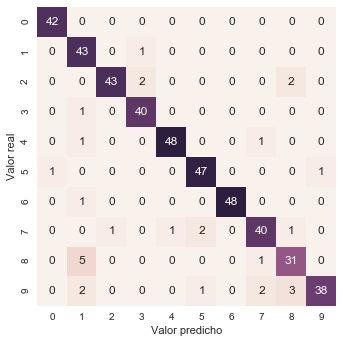

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=54)

from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_features=30)
model4.fit(X_train, y_train)
y_model4 = model4.predict(X_test)


## Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(y_test, y_model4)))

## Métricas clasicas de Clasificadores
from sklearn import metrics
print(metrics.classification_report(y_model4, y_test))

## Matriz de confusión
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model4)

plt.close()

sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')

**c) ¿Cuál resulta mejor?**

En este ejemplo en realidad los resultados parecen muy similares tanto en accuracy, precison, recall y f1_score,
pero 
Dado que el random forest toma una muestra con reemplazo para crear cada árbol, no podemos simplemente comparar las métricas(accuracy, precision, etc.) con 1 ejemplo dado que el resultado es distinto cada vez que tomamos una muestra entonces si hacemos una gráfica de acurracy en 100 iteraciones veremos si es verdad que alguno de los modelos es mejor o no que el resto... 

In [16]:
m1=[]
m2=[]
m3=[]
m4=[]
w=[]
for i in range(100):
    model = RandomForestClassifier(n_estimators=10)
    model.fit(X_train, y_train)
    y_model = model4.predict(X_test)
    a=accuracy_score(y_test, y_model)
    m1.append(a)
    
    
    model2 = RandomForestClassifier(max_features=10)
    model2.fit(X_train, y_train)
    y_model2 = model2.predict(X_test)
    b=accuracy_score(y_test, y_model2)
    m2.append(b)
    
    model3 = RandomForestClassifier(max_features=20)
    model3.fit(X_train, y_train)
    y_model3 = model3.predict(X_test)
    c=accuracy_score(y_test, y_model3)
    m3.append(c)
    
    model4 = RandomForestClassifier(max_features=30)
    model4.fit(X_train, y_train)
    y_model4 = model4.predict(X_test)
    d=accuracy_score(y_test, y_model4)
    m4.append(d)    
    
    k=np.where(np.array([a,b,c,d]==max(a,b,c,d)))[0][0] 
               
    w.append(k)           

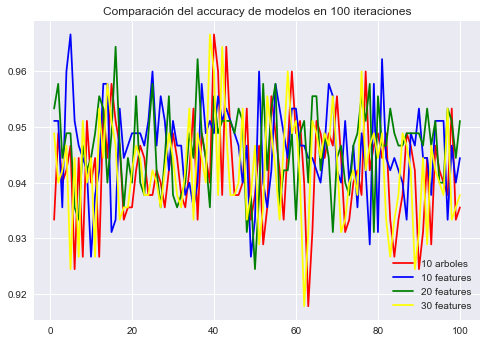

In [69]:
x=np.linspace(1,100,100)
plt.plot(x,m1,color='red',label='10 arboles')
plt.plot(x,m2,color='blue',label='10 features')
plt.plot(x,m3,color='green',label='20 features')
plt.plot(x,m4,color='yellow',label='30 features')
plt.legend(loc="lower right")
plt.title('Comparación del accuracy de modelos en 100 iteraciones')

Si sacamos la frecuencia de cual es modelo que tiene mejor accuracy en 100 teraciones vemos que sería el modelo 2 que corresponde a 10 features que tiene más de 30% de veces el menor error de clasificación.

In [70]:
np.unique(w, return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([16, 42, 31, 11], dtype=int64))

In [71]:
cuenta = pd.Series(w).value_counts()
cuenta = pd.DataFrame(data=cuenta)
cuenta.columns = ['veces ganador']
cuenta

,veces ganador
1,42
2,31
0,16
3,11


Entonces de las 100 iteraciones, el modelo 2 fue el ganador con 42 veces con el mayor accuracy seguido del modelo 3 con 31 veces con el mayor accuracy.

**Tarea 7/Ejercicio 3**

Cambia de clasificador a GaussianNB



Accuracy: 0.8444444444444444
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        42
          1       0.80      0.83      0.81        42
          2       0.68      0.94      0.79        34
          3       0.76      1.00      0.86        31
          4       0.82      0.98      0.89        42
          5       0.92      0.88      0.90        51
          6       1.00      0.92      0.96        53
          7       0.96      0.74      0.83        58
          8       0.92      0.51      0.65        67
          9       0.61      0.93      0.74        30

avg / total       0.87      0.84      0.84       450



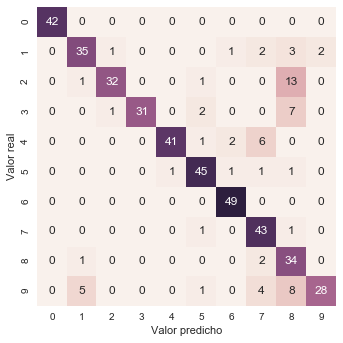

In [72]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train,y_train) 
pred=NB.predict(X_test) 


## Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(y_test, pred)))

## Métricas clasicas de Clasificadores
from sklearn import metrics
print(metrics.classification_report(pred, y_test))

## Matriz de confusión
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, pred)

plt.close()

sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')

La justificación de no poner parámetros se debe a que en primer lugar GaussianNB sólo toma 1 parámetro las prbabilidades apriori ajustadas con los datos, es decir, por default ajusta los priors de acuedo con la proporción de cada clase en la base, entonces dado que no es nuestra intención cambiar estos priors
(esto podría servir para sobrecargar) entonces no los movemos de todos modos si vemos abajo se muestran los priors de las 10 clases.

In [73]:
np.bincount(y_train)/len(y_train)

array([ 0.10096511,  0.10244989,  0.09651076,  0.10541945,  0.09725316,
        0.09873794,  0.09799555,  0.09948033,  0.1017075 ,  0.09948033])

en este caso as clases estan balanceadas cada una tiene una apriori de 10% casi.

**¿Cuál de todos los modelos ocupados resulta mejor para este dataset?**

Dentro de los modelosque mostramos el random forest con 10 features máximo es el que mejor funcion como lo vimos en el ejercicio anterior, el GaussianNB tiene un desempeño mucho menor como lo vemos aquí en todas las métricas.